In [38]:
#GreyCampus DataScience Practice using insurance data

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
insurance_dataset = pd.read_csv('E:/Users/nelod/insurance.csv')

In [15]:
print(insurance_dataset)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
7      37  female  27.740         3     no  northwest   7281.50560
8      37    male  29.830         2     no  northeast   6406.41070
9      60  female  25.840         0     no  northwest  28923.13692
10     25    male  26.220         0     no  northeast   2721.32080
11     62  female  26.290         0    yes  southeast  27808.72510
12     23    male  34.400         0     no  southwest   1826.84300
13     56  female  39.820         0     no  southeast  11090.7

In [6]:
insurance_dataset.dtypes

age,sex,bmi,children,smoker,region,charges    object
dtype: object

In [7]:
insurance_dataset.shape

(1338, 1)

In [16]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:

insurance_dataset['age'].value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [18]:
insurance_dataset[(insurance_dataset['age'] == 19) & (insurance_dataset['charges']>10000)]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
126,19,female,28.300,0,yes,southwest,17081.08000
223,19,male,34.800,0,yes,southwest,34779.61500
238,19,male,29.070,0,yes,northwest,17352.68030
259,19,male,31.920,0,yes,northwest,33750.29180
263,19,male,36.955,0,yes,northwest,36219.40545
296,19,male,27.700,0,yes,southwest,16297.84600
362,19,female,21.700,0,yes,southwest,13844.50600
430,19,male,33.100,0,no,southwest,23082.95533
503,19,male,30.250,0,yes,southeast,32548.34050


In [19]:
insurance_dataset.apply(lambda x: sum(x.isnull()),axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

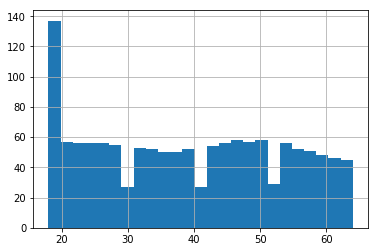

In [20]:
insurance_dataset['age'].hist(bins=25)

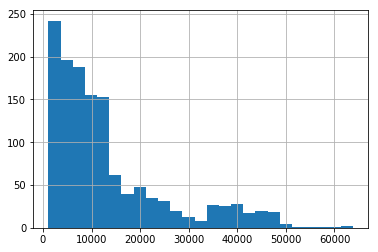

In [21]:
insurance_dataset['charges'].hist(bins=25)

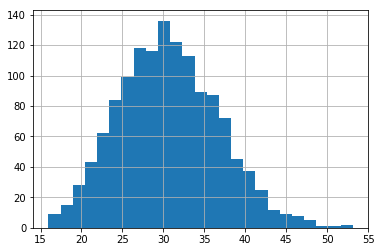

In [22]:
insurance_dataset['bmi'].hist(bins=25)

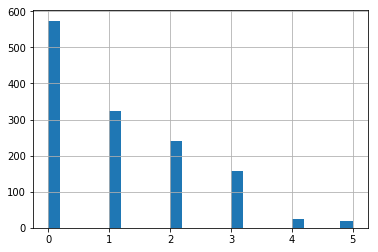

In [23]:
insurance_dataset['children'].hist(bins=25)

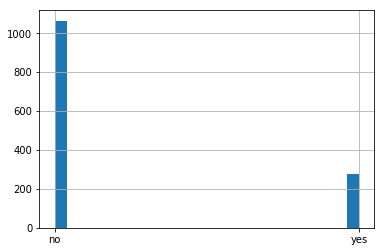

In [24]:
insurance_dataset['smoker'].hist(bins=25)

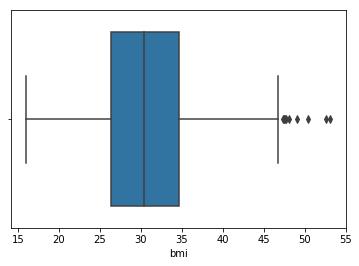

In [25]:
sns.boxplot(x=insurance_dataset['bmi'])

In [26]:
corr = insurance_dataset.corr()

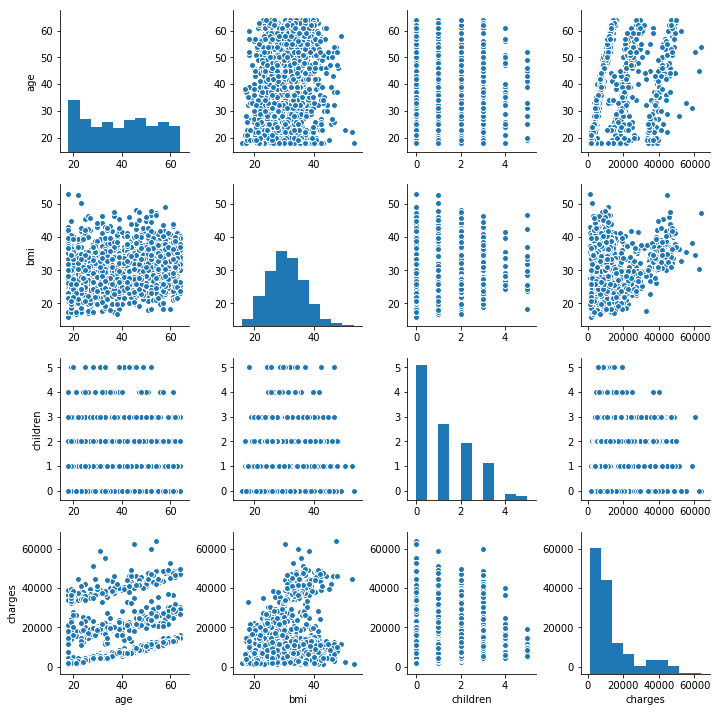

In [27]:
sns.pairplot(insurance_dataset)
plt.show()

In [28]:
print(corr)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [29]:
bm_charges = insurance_dataset[['bmi','charges']]
bm_charges.head()

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520


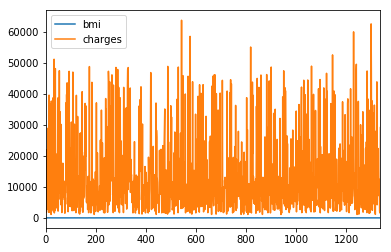

In [30]:
bm_charges.plot()

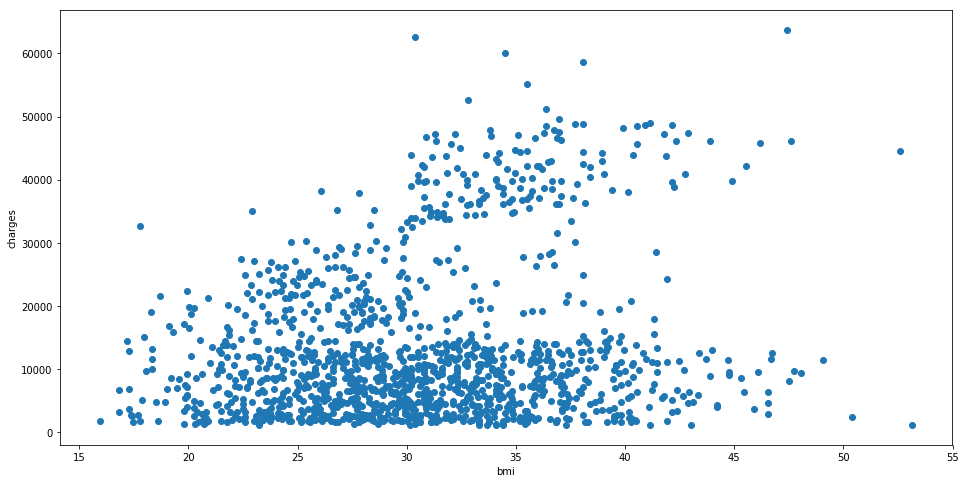

In [31]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(insurance_dataset['bmi'],insurance_dataset['charges'])
ax.set_xlabel('bmi')
ax.set_ylabel('charges')
plt.show()

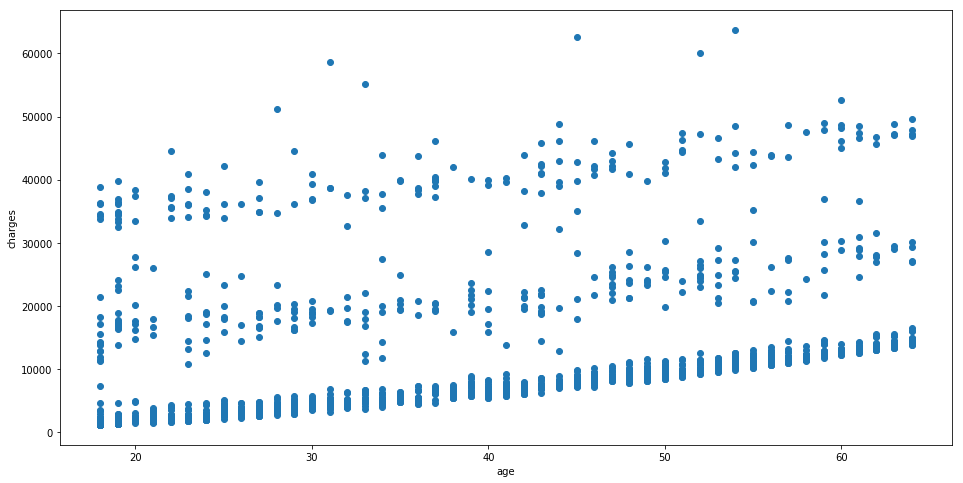

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(insurance_dataset['age'],insurance_dataset['charges'])
ax.set_xlabel('age')
ax.set_ylabel('charges')
plt.show()

In [33]:
x = insurance_dataset.drop(columns=['sex','region','charges'])
x['smoker']= x['smoker'].astype('category')
x['smoker']= x['smoker'].cat.codes
print(x.dtypes)
y = insurance_dataset.iloc[:,6]
print(x)
print(y)

TypeError: drop() got an unexpected keyword argument 'columns'

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x,y)

print('Intercept: \n', regr.intercept_)
print('Coeficcients: \n',regr.coef_)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
lin_reg = linear_model.LinearRegression()

In [ ]:
lin_reg.fit(x_train,y_train)

In [ ]:
lin_reg_pred = lin_reg.predict(x_test)

#coef and intercept
print("Coefficients: \n",lin_reg.coef_)
print("Intercept: \n",lin_reg.intercept_)

#mean square error
print("Mean squared error: %.2f" % mean_squared_error(y_test,lin_reg_pred))

#explained variance score: 1 is pf prediction
print("Variance score: %.2f" % r2_score(y_test,lin_reg_pred))

In [ ]:
plt.scatter(x_test['age'],y_test,color='red')
plt.plot(x_test['age'],lin_reg_pred,color='blue')
plt.title('age bmi children smoke vs charges')
plt.xlabel('age bmi children smoke')
plt.ylabel('charges')
plt.show()

In [34]:
x = insurance_dataset.drop(columns=['sex','children','region','charges'])
x['smoker']= x['smoker'].astype('category')
x['smoker']= x['smoker'].cat.codes
print(x.dtypes)
y = insurance_dataset.iloc[:,6]
x.head()
y.head()

TypeError: drop() got an unexpected keyword argument 'columns'

In [35]:

insurance_dataset = pd.read_csv('E:/Users/nelod/Downloads/insurance.csv') 
correlation_matrix = insurance_dataset.corr().round(2)
#sns.heatmap(data=correlation_matrix, annot=True)

FileNotFoundError: File b'E:/Users/nelod/Downloads/insurance.csv' does not exist

In [36]:

print(insurance_dataset.keys())
print(insurance_dataset)
sns.heatmap(data=correlation_matrix, annot=True)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
7      37  female  27.740         3     no  northwest   7281.50560
8      37    male  29.830         2     no  northeast   6406.41070
9      60  female  25.840         0     no  northwest  28923.13692
10     25    male  26.220         0     no  northeast   2721.32080
11     62  female  26.290         0    yes  southeast  27808.72510
12     23    male  34.400         0     n

NameError: name 'correlation_matrix' is not defined

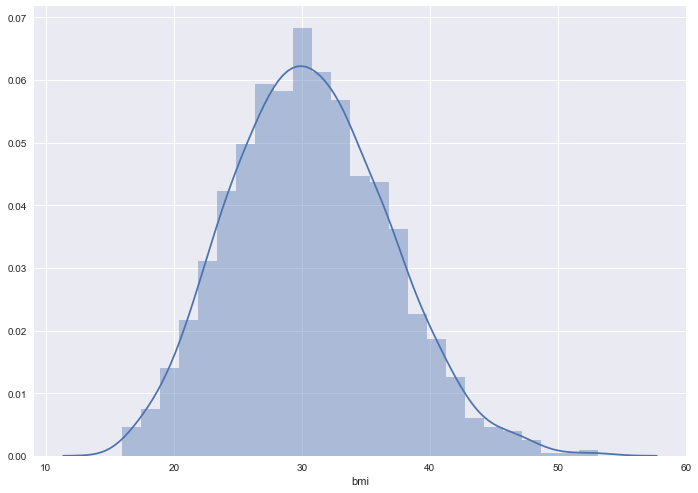

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(insurance_dataset['bmi'], bins = 25)
plt.show()

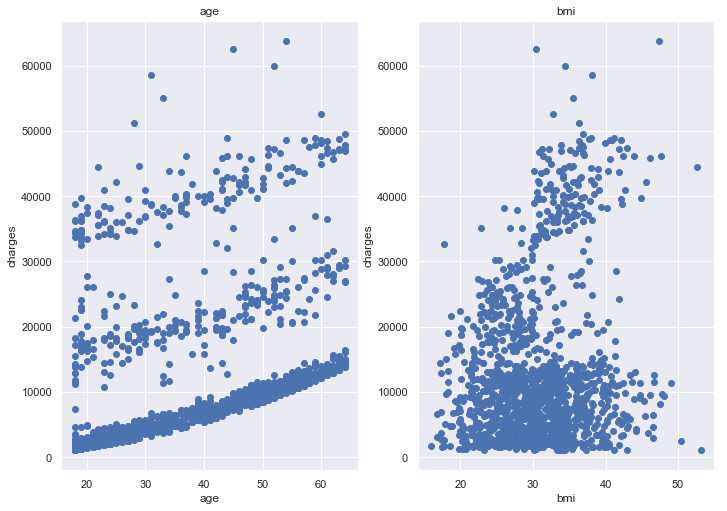

In [25]:
features = ['age','bmi']
target = insurance_dataset['charges']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = insurance_dataset[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('charges')